In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [196]:
dataset_battles = pd.read_csv('battles.csv')
dataset_death =  pd.read_csv('character-deaths.csv')

In [197]:
dataset_battles.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [198]:
dataset_battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [199]:
dataset_death =  pd.read_csv('character-deaths.csv')

In [200]:
# Lets see who kings who attacked the most 


In [201]:
attacker_king = dataset_battles.copy()

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt 

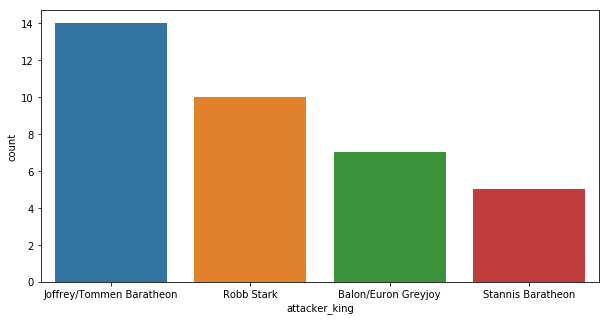

In [203]:
plt.figure(figsize =(10,5))
sns.countplot(x = attacker_king['attacker_king'] ,data = attacker_king)
plt.show()

In [204]:
# Lets check who has won the most of times

In [208]:
attacker_king['attacker_king'] = attacker_king[attacker_king['attacker_outcome'] == 'win']['attacker_king']

In [ ]:
plt.figure(figsize =(10,5))
sns.countplot(x='attacker_king',data=attacker_king)
plt.show()

In [ ]:
Percentage_of_wins = (attacker_king['attacker_king'] .value_counts() / dataset_battles['attacker_king'].value_counts())*100

In [ ]:
plt.figure(figsize =(10,5))
sns.barplot(x=Percentage_of_wins.index,y =Percentage_of_wins.values)
plt.show()

In [ ]:
# Lets seewho has been attacked the most 

In [210]:
defenders = dataset_battles.copy()

In [211]:
defenders = defenders.dropna(subset=['defender_king','attacker_outcome'])

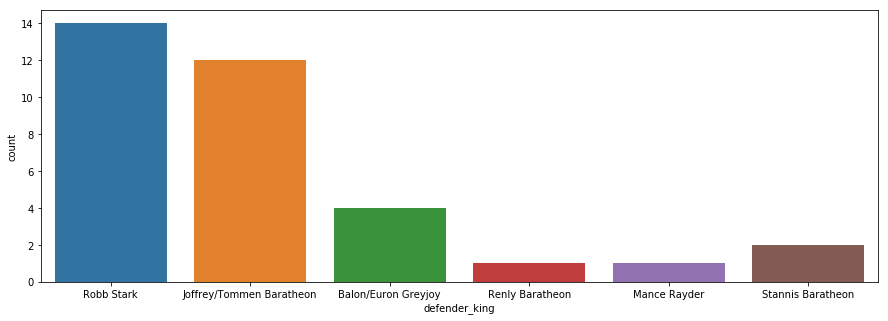

In [212]:
plt.figure(figsize =(15,5))
sns.countplot(x= 'defender_king' , data = defenders )
plt.show()

In [213]:
# Lets see good defenders 
defender = pd.DataFrame()

In [214]:
defender['defender_king'] = defenders[defenders['attacker_outcome'] == 'loss']['defender_king']

In [215]:
Percentage_defenders = ( defender['defender_king'].value_counts() / defenders['defender_king'].value_counts() )*100

In [216]:
Percentage_defenders = Percentage_defenders.dropna()

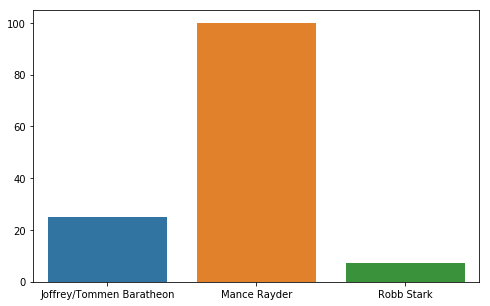

In [217]:
plt.figure(figsize =(8,5))
sns.barplot(x=Percentage_defenders.index,y =Percentage_defenders.values)
plt.show()

In [ ]:
# mance rayder has defended himself whenver he was attacked 


In [ ]:
# lets see which kind of battle field do various attakcers prefer 

In [ ]:
battle_preference = dataset_battles.copy()

In [ ]:
difference_army_size = battle_preference['attacker_size'] - battle_preference['defender_size']

In [ ]:
difference_army_size = difference_army_size

In [ ]:
battle_preference['difference_army_size'] = difference_army_size

In [ ]:
battle_preference = battle_preference.dropna(subset=['difference_army_size','attacker_outcome'])

In [ ]:
plt.figure(figsize=(14,10))
ax = sns.catplot(x='attacker_king',y='difference_army_size',hue='attacker_outcome',kind='swarm',data=battle_preference)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Stannis has won a war where he had less army size and lost when his army size was much larger 

In [18]:
battleground_type = dataset_battles.copy()

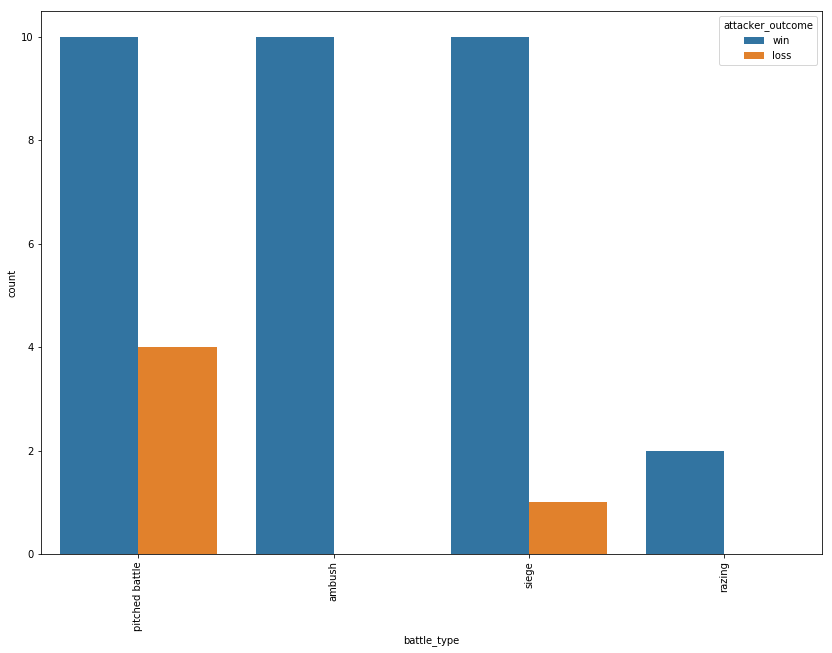

In [19]:
plt.figure(figsize=(14,10))
ax = sns.countplot(x='battle_type',hue='attacker_outcome',data=battleground_type)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# ambush has helped almost everyone !!! there has been 10 ambushes and attacker has never lost any secomnd is siege . 

In [ ]:
# lets see which attacking_commander has highest

In [102]:
attacker_commander_stats = dataset_battles.copy()

In [103]:
attacker_commander_stats = attacker_commander_stats.dropna(subset=['attacker_commander'])

commander_wins = []
for index,rows in attacker_commander_stats.iterrows():
    x = rows.attacker_commander.split(',')       

    for a in x:
        try:
            a = a.lstrip()
        except:
            pass
        commander_wins.append([rows['name'],a.rstrip(),rows['attacker_outcome']])            

In [104]:
commander_wins = pd.DataFrame(commander_wins,columns = ['BattleName','CommanderName','AttackerOutcome'])
commander_wins['AttackerOutcome'] = commander_wins['AttackerOutcome'].map({'win':1,'loss':0})



In [105]:
commander_wins_tot_count = commander_wins.groupby('CommanderName').agg({'AttackerOutcome':'sum'})

commander_total_battle = commander_wins.CommanderName.value_counts().rename_axis('CommanderName').reset_index(name='total_battles')

In [106]:
commander_total_battle = commander_total_battle[commander_total_battle['total_battles'] > 2]

commander_outcomes = commander_total_battle.merge(commander_wins_tot_count,left_on='CommanderName',right_on='CommanderName')


In [107]:
commander_outcomes['percentage']=(commander_outcomes['AttackerOutcome'] / commander_outcomes['total_battles'])*100

commander_outcomes = commander_outcomes.sort_values(by='percentage',ascending = False)

In [108]:
commander_outcomes

,CommanderName,total_battles,AttackerOutcome,percentage
2,Robb Stark,4,4.0,100.000000
3,Jaime Lannister,4,4.0,100.000000
4,Brynden Tully,3,3.0,100.000000
6,Victarion Greyjoy,3,3.0,100.000000
7,Theon Greyjoy,3,3.0,100.000000
0,Gregor Clegane,5,4.0,80.000000
5,Roose Bolton,3,2.0,66.666667
1,Stannis Baratheon,4,2.0,50.000000


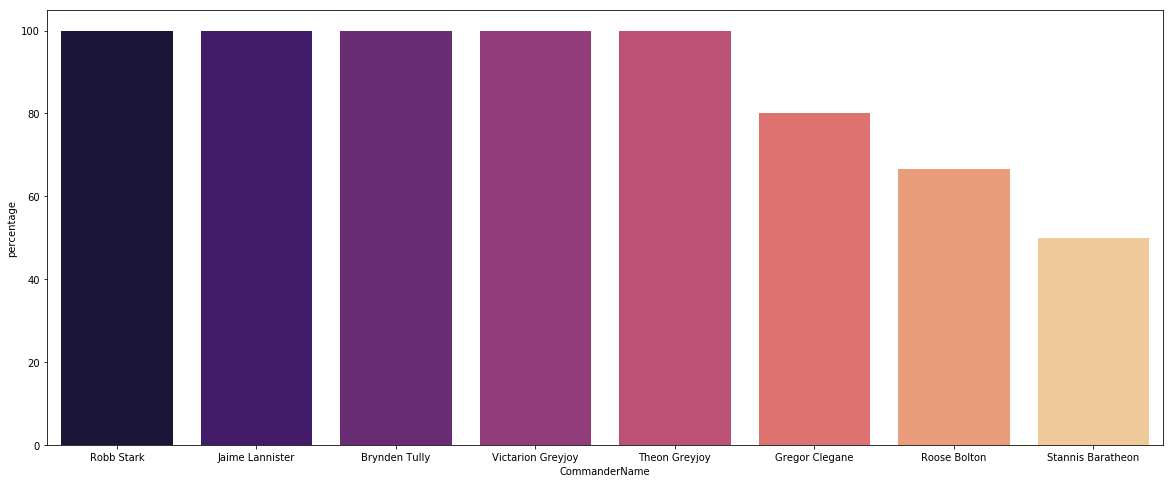

In [194]:
plt.figure(figsize =(20,8))
sns.barplot(x=commander_outcomes.CommanderName,y =commander_outcomes.percentage,palette='magma')
plt.show()

In [175]:
defender_commander_stats = dataset_battles.copy()

In [176]:
defender_commander_stats = defender_commander_stats.dropna(subset=['defender_commander'])

In [177]:
attacker_commander_stats = attacker_commander_stats.dropna(subset=['defender_commander'])

defending_commander_wins = []
for index,rows in attacker_commander_stats.iterrows():
    x = rows.defender_commander.split(',')       

    for a in x:
        try:
            a = a.lstrip()
        except:
            pass
        defending_commander_wins.append([rows['name'],a.rstrip(),rows['attacker_outcome']])            

In [178]:
defending_commander_wins = pd.DataFrame(defending_commander_wins,columns = ['BattleName','CommanderName',
                                                                            'DefenderOutcome'])

In [179]:
defending_commander_wins['DefenderOutcome'] = defending_commander_wins['DefenderOutcome'].map({'win':0,'loss':1})

In [180]:
defending_commander_wins_tot = defending_commander_wins.groupby('CommanderName').agg({'DefenderOutcome':'sum'})
defending_commander_wins = defending_commander_wins.CommanderName.value_counts().rename_axis('CommanderName').reset_index(name='total_battles')

In [184]:
def_commander_outcomes = defending_commander_wins_tot.merge(defending_commander_wins,
                                                            left_on='CommanderName',right_on='CommanderName')
def_commander_outcomes['percentage']=(def_commander_outcomes['DefenderOutcome'] 
                                      / def_commander_outcomes['total_battles'])*100

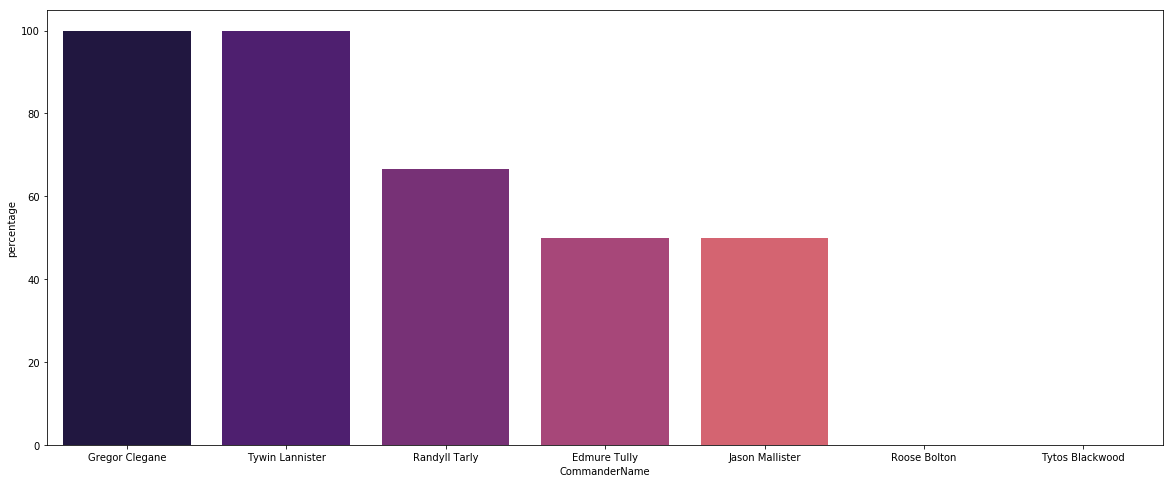

In [193]:
def_commander_outcomes = def_commander_outcomes[def_commander_outcomes['total_battles'] > 1]
def_commander_outcomes = def_commander_outcomes.sort_values(by='percentage',ascending = False)
plt.figure(figsize =(20,8))
sns.barplot(x=def_commander_outcomes['CommanderName'],y=def_commander_outcomes['percentage'],palette='magma')
plt.show()

In [89]:
battles_location = dataset_battles.copy()


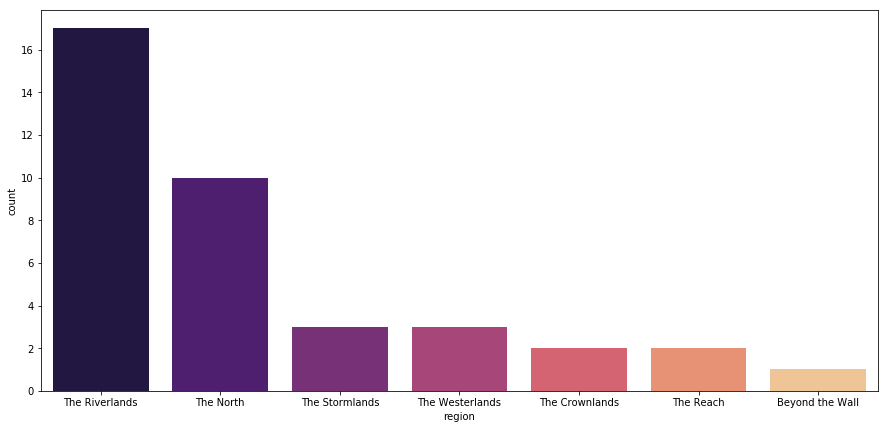

In [111]:
plt.figure(figsize =(15,7))
sns.countplot(x = battles_location['region'] ,data = battles_location,palette='magma', 
              order = battles_location['region'].value_counts().index)
plt.show()